## Importações

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score,roc_curve

from sklearn.preprocessing import RobustScaler

from matplotlib import pyplot as plt
import seaborn as sns

## Analise exploratoria e tratamento de dados

In [2]:
# lendo arquivo csv
data = pd.read_csv("assets/BankChurners.csv")

# removendo colunas irrelevantes do dataset
data = data.drop(columns=["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
print(data.head())

      Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1     

In [3]:
# buscando por valores nulos
print(data.isna().sum())
#buscando por valroes duplicados
print(f"duplicados:{data.duplicated().sum()}")

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
duplicados:0


In [4]:
#verificando estrutuda geral dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Os dados não apresentam colunas vazias nem duplicadas

In [5]:
#observando valores gerais dos dados
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
# Função para contar outliers usando o método IQR
def contar_outliers_iqr(df):
    outliers_por_coluna = {}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        outliers_por_coluna[col] = outliers.shape[0]

    return outliers_por_coluna

outliers = contar_outliers_iqr(data)
print(outliers)
dataout = data.copy()

{'Customer_Age': 2, 'Dependent_count': 0, 'Months_on_book': 386, 'Total_Relationship_Count': 0, 'Months_Inactive_12_mon': 331, 'Contacts_Count_12_mon': 629, 'Credit_Limit': 984, 'Total_Revolving_Bal': 0, 'Avg_Open_To_Buy': 963, 'Total_Amt_Chng_Q4_Q1': 396, 'Total_Trans_Amt': 896, 'Total_Trans_Ct': 2, 'Total_Ct_Chng_Q4_Q1': 394, 'Avg_Utilization_Ratio': 0}


Podemos notar a presença de uma grande quantidade de outliers, chegando a aproximadamente 9% de algumas colunas, dada a grande quantidade de outliers comparada a os dados é necessario que sejam tratados, e não apenas removidos para que possamos manter a maior quantidade de dados possivel

### Tratando os outliers

In [7]:
#função para winsorização
def winsorize_series(series, lower_quantile=0.02, upper_quantile=0.98):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower=lower, upper=upper)

#winsorização - escala ampla com valores importantes
data['Credit_Limit'] = winsorize_series(data['Credit_Limit'])
data['Total_Revolving_Bal'] = winsorize_series(data['Total_Revolving_Bal'])
data['Avg_Utilization_Ratio'] = winsorize_series(data['Avg_Utilization_Ratio'])
data['Customer_Age'] = winsorize_series(data['Customer_Age'])
data['Months_on_book'] = winsorize_series(data['Months_on_book'])
data['Contacts_Count_12_mon'] = winsorize_series(data['Contacts_Count_12_mon'])
#O RobustScaler utiliza mediana e IQR, o que o torna resistente a outliers, mantendo a escala dos dados
scaler = RobustScaler()
data[['Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1','Credit_Limit','Total_Revolving_Bal','Avg_Utilization_Ratio','Avg_Open_To_Buy']] = scaler.fit_transform(data[['Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1','Credit_Limit','Total_Revolving_Bal','Avg_Utilization_Ratio','Avg_Open_To_Buy']])

Os outliers foram tratados com: 

Winsorização para realocação de outliers muito extremos, abaixo de 2% e acima de 98%

Robustscaler foi utilizado para redução do impacto dos outliers durante o treinamento dos modelos

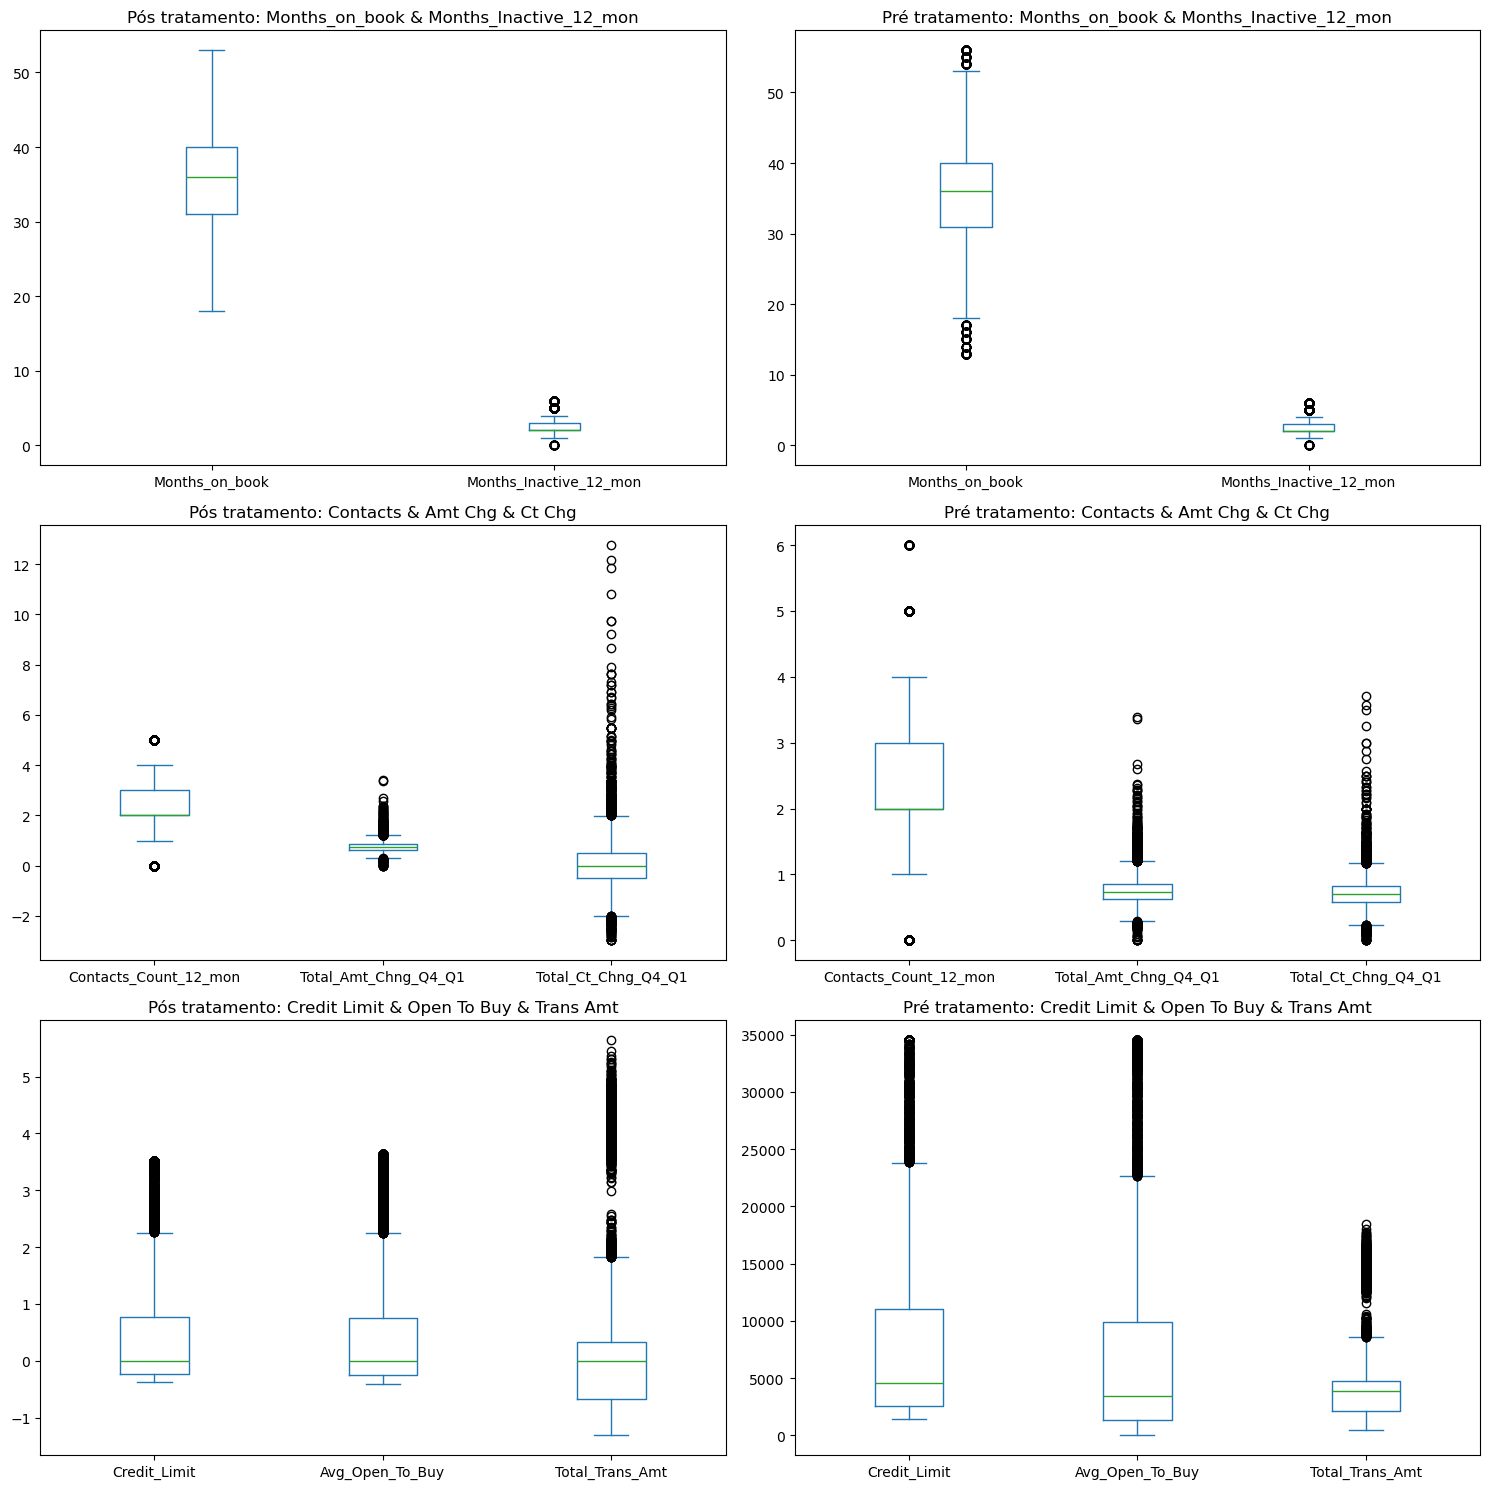

In [8]:
#criando graficos para visualização de outliers, comparando pre e pós processamento de outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 1ª linha - Gráfico 1
data[['Months_on_book','Months_Inactive_12_mon']].plot(kind="box", ax=axes[0, 0])
axes[0, 0].set_title('Pós tratamento: Months_on_book & Months_Inactive_12_mon')

# 1ª linha - Gráfico 2
dataout[['Months_on_book','Months_Inactive_12_mon']].plot(kind="box", ax=axes[0, 1])
axes[0, 1].set_title('Pré tratamento: Months_on_book & Months_Inactive_12_mon')

# 2ª linha - Gráfico 3
data[['Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']].plot(kind="box", ax=axes[1, 0])
axes[1, 0].set_title('Pós tratamento: Contacts & Amt Chg & Ct Chg')

# 2ª linha - Gráfico 4
dataout[['Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']].plot(kind="box", ax=axes[1, 1])
axes[1, 1].set_title('Pré tratamento: Contacts & Amt Chg & Ct Chg')

# 3ª linha - Gráfico 5
data[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']].plot(kind="box", ax=axes[2, 0])
axes[2, 0].set_title('Pós tratamento: Credit Limit & Open To Buy & Trans Amt')

# 3ª linha - Gráfico 6
dataout[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']].plot(kind="box", ax=axes[2, 1])
axes[2, 1].set_title('Pré tratamento: Credit Limit & Open To Buy & Trans Amt')

plt.tight_layout()
plt.show()


In [9]:
# comparando contagem de outliers
print(f"Contagem dos outliers com e sem tratamento\n")

outliers = contar_outliers_iqr(data)
print(f"Com tratamento:\n{outliers}\n")

outliers = contar_outliers_iqr(dataout)
print(f"Sem tratamento:\n{outliers}")

Contagem dos outliers com e sem tratamento

Com tratamento:
{'Customer_Age': 0, 'Dependent_count': 0, 'Months_on_book': 0, 'Total_Relationship_Count': 0, 'Months_Inactive_12_mon': 331, 'Contacts_Count_12_mon': 629, 'Credit_Limit': 984, 'Total_Revolving_Bal': 0, 'Avg_Open_To_Buy': 963, 'Total_Amt_Chng_Q4_Q1': 396, 'Total_Trans_Amt': 896, 'Total_Trans_Ct': 2, 'Total_Ct_Chng_Q4_Q1': 394, 'Avg_Utilization_Ratio': 0}

Sem tratamento:
{'Customer_Age': 2, 'Dependent_count': 0, 'Months_on_book': 386, 'Total_Relationship_Count': 0, 'Months_Inactive_12_mon': 331, 'Contacts_Count_12_mon': 629, 'Credit_Limit': 984, 'Total_Revolving_Bal': 0, 'Avg_Open_To_Buy': 963, 'Total_Amt_Chng_Q4_Q1': 396, 'Total_Trans_Amt': 896, 'Total_Trans_Ct': 2, 'Total_Ct_Chng_Q4_Q1': 394, 'Avg_Utilization_Ratio': 0}


Ao comprar os dados pre tratamento e pós tratamento pode-se perceber uma pequena redução dos outliers, porem ainda notamos a presença de muitos no dataset, estes por sua vez tiveram seus valores atenuados pelo RobustScaler

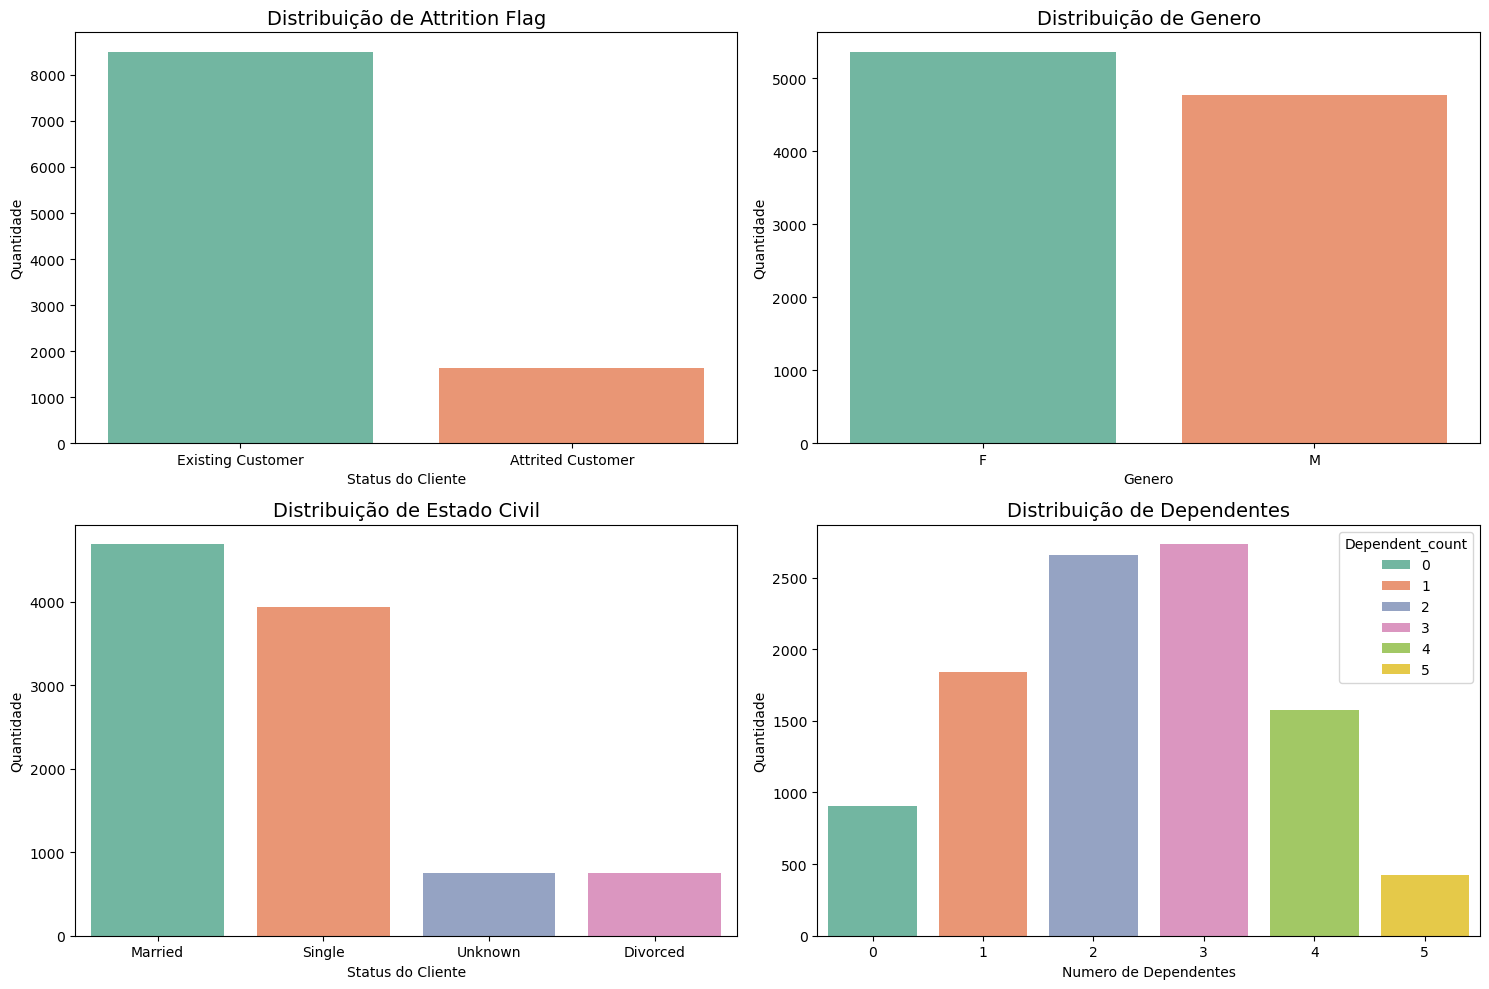

In [10]:
# criando graficos para visualização de dados gerais

#dividiondo visualização em 2x2
fig, ax = plt.subplots(2,2, figsize=(15,10)) 


attF = data['Attrition_Flag'].value_counts().reset_index()
attF.columns = ["Attrition_Flag","counts"]

gender = data['Gender'].value_counts().reset_index()
gender.columns = ["Gender","counts"]

mStat = data['Marital_Status'].value_counts().reset_index()
mStat.columns = ["Marital_Status","counts"]

dCount = data['Dependent_count'].value_counts().reset_index()
dCount.columns = ["Dependent_count","counts"]

#criando e definindo posições dos subplots
sns.barplot(data=attF, hue="Attrition_Flag", palette='Set2'
            ,x="Attrition_Flag",y="counts", ax=ax[0][0])

ax[0][0].set_title("Distribuição de Attrition Flag",fontsize=14)
ax[0][0].set_xlabel("Status do Cliente")
ax[0][0].set_ylabel("Quantidade")

sns.barplot(data=gender, palette='Set2',hue = "Gender"
            ,x="Gender",y="counts", ax=ax[0][1])

ax[0][1].set_title("Distribuição de Genero",fontsize=14)
ax[0][1].set_xlabel("Genero")
ax[0][1].set_ylabel("Quantidade")

sns.barplot(data = mStat, palette='Set2', hue = "Marital_Status",
            x="Marital_Status",y="counts", ax=ax[1][0])

ax[1][0].set_title("Distribuição de Estado Civil",fontsize=14)
ax[1][0].set_xlabel("Status do Cliente")
ax[1][0].set_ylabel("Quantidade")


sns.barplot(data = dCount, palette='Set2', hue = "Dependent_count",
            x="Dependent_count",y="counts",ax=ax[1][1])

ax[1][1].set_title("Distribuição de Dependentes",fontsize=14)
ax[1][1].set_xlabel("Numero de Dependentes")
ax[1][1].set_ylabel("Quantidade")

plt.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()


In [11]:
# visualizando valores numericos para uma avaliação mais precisa dos valores 
print(f"{data['Attrition_Flag'].value_counts(normalize=True)*100}\n------\n{data['Gender'].value_counts(normalize=True)*100}")

Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64
------
Gender
F    52.908068
M    47.091932
Name: proportion, dtype: float64


Podemos notar que o dataset esta desbalanceado, 83.93/16.06 aproximadamente, este deve ser balanceado para que possa ser treinado

In [12]:
# convertendo targuet (atrtrition_flag) para boolean
data = pd.get_dummies(data, columns=['Attrition_Flag'],drop_first=False)
# removendo uma das colunas, apenas uma é necessaria para a avaliação, ambas demonstram os mesmos valores em polos opostos 
data = data.drop(columns="Attrition_Flag_Existing Customer")

Variáveis com correlação >= 2% com Attrition_Flag_Attrited Customer:
['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag_Attrited Customer', 'Gender_F', 'Gender_M', 'Education_Level_Doctorate', 'Marital_Status_Married', 'Income_Category_$60K - $80K', 'Income_Category_Less than $40K']


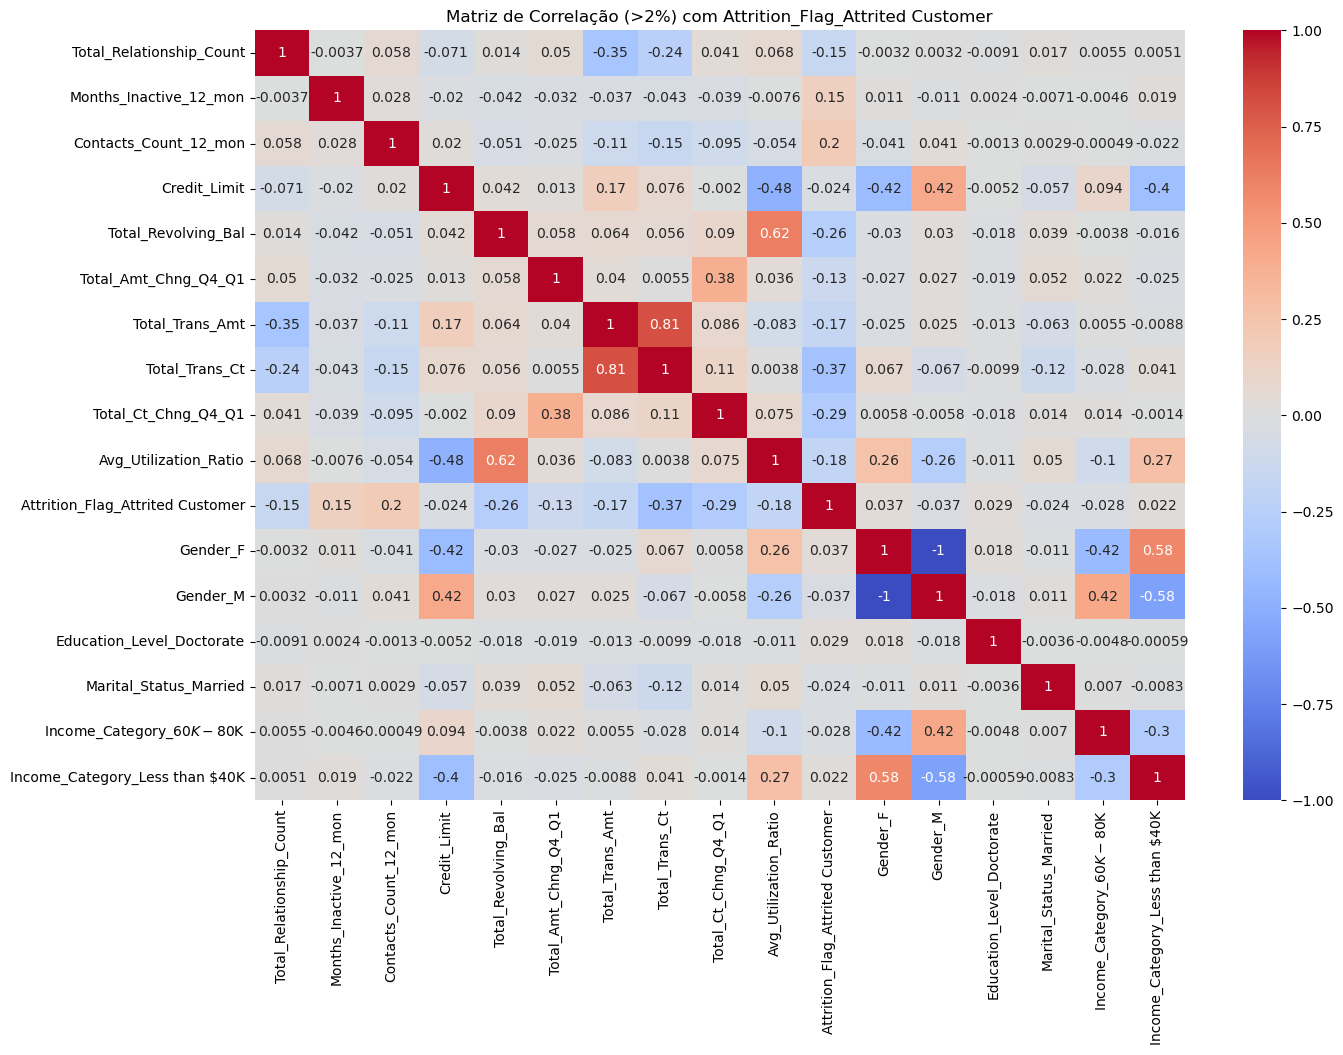

In [13]:
# transformando demais variaveis qualitativas
data = pd.get_dummies(data)

# Definindo o target corretamente
target = 'Attrition_Flag_Attrited Customer'

# Matriz de correlação
corr = data.corr(numeric_only=True)

# Correlação do target com todas as variáveis
corr_target = corr[target].abs()

# Selecionar variáveis com correlação >= 0.02 (2%)
relevant_features = corr_target[corr_target >= 0.02].index.tolist()

print(f"Variáveis com correlação >= 2% com {target}:")
print(relevant_features)

# Subset da matriz de correlação apenas com essas variáveis
corr_subset = data[relevant_features].corr()

# Plot da matriz filtrada
plt.figure(figsize=(15, 10))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f"Matriz de Correlação (>2%) com {target}")
plt.show()

Podemos notar que ha uma correlação entre o tempo de inatividade (months_inacative_12_mon: 15%) e o cancelamento dos serviçõs.

Também é possivel perceber que ha uma relação inversa mais intensa entre o total de transações (Total_Trans_Ct: 37%) e a mudança nas contagens de transações realisadas (Total_Ct_Chng_Q4_Q1: 29%). O que pode indicar que são fatores que mantem os clientes ativos.

Aplicando onehot encode para que possamos treinar o modelo

In [14]:
# separando features e targuet
X = data.drop('Attrition_Flag_Attrited Customer', axis=1)
y = data['Attrition_Flag_Attrited Customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Treinamento do modelo

In [15]:
# definindo pipeline
pipeline = Pipeline([
    # aplicando standard scaler 
    ('scaler', StandardScaler()),
    # apliando over sampling 
    ('smote', SMOTE(random_state=42)),

    # executando modelo
    ('clf', RandomForestClassifier(random_state=42))
])


param_grid = [{
    'clf': [RandomForestClassifier(random_state=42)],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
},
{
    'clf':[LogisticRegression(max_iter=1000)],
    'clf__C':[0.1,1,10]
},
{
    'clf': [DecisionTreeClassifier(random_state=42)],
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__max_depth': [None, 5, 10, 20, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
},
{
    'clf': [KNeighborsClassifier()],
    'clf__n_neighbors': list(range(1, 31)),
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
},
]

scoring = {
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision',
    'roc_auc': 'roc_auc'
}

# definindo parametros do GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf': [RandomForestClassifier(random_state=42)],
                          'clf__max_depth': [None, 10, 20],
                          'clf__min_samples_split': [2, 5],
                          'clf__n_estimators': [100, 200]},
                         {'clf': [LogisticRegression(max_i...
                          'clf__min_samples_split': [2, 5, 10]},
                         {'clf': [KNeighborsClassifier()],
                          'clf__metric': ['euclidean', 'manhattan',
                                          'minkowski'],
                          'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30],
                          'clf__weights': ['uniform', 'distance']}],
             refit='f1',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

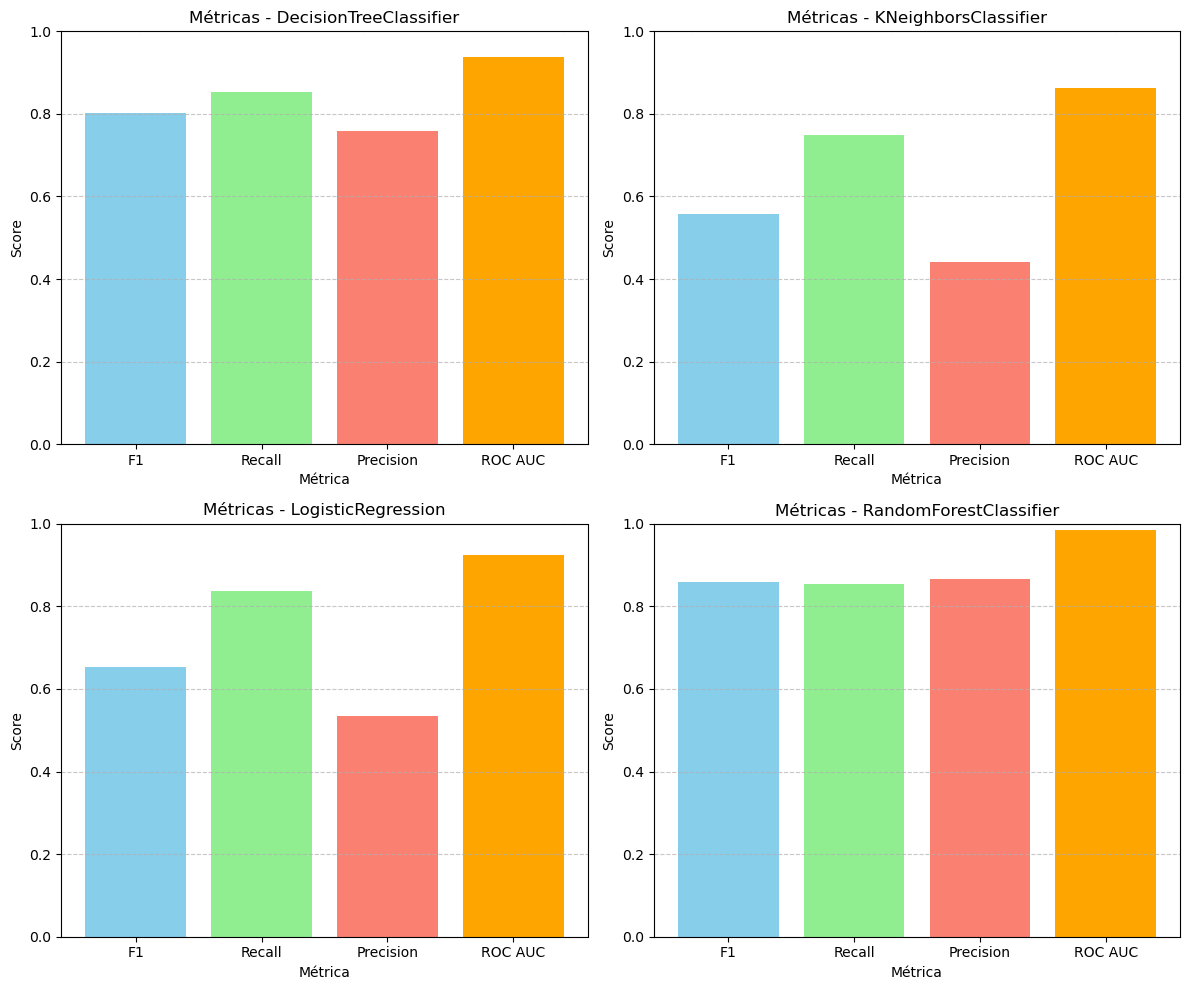

In [16]:
# Transforma os resultados em DataFrame para facilitar a visualização
results_df = pd.DataFrame(grid_search.cv_results_)


# Criar coluna com nome do modelo
results_df['model_name'] = results_df['param_clf'].apply(lambda x: type(x).__name__)

# Encontrar o melhor resultado de cada modelo
best_per_model = results_df.loc[results_df.groupby('model_name')['mean_test_f1'].idxmax()]

# Configurar o subplot 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Facilita iteração

# Para cada modelo, criar um gráfico de barras
for i, (idx, row) in enumerate(best_per_model.iterrows()):
    model = row['model_name']
    metrics = {
        'F1': row['mean_test_f1'],
        'Recall': row['mean_test_recall'],
        'Precision': row['mean_test_precision'],
        'ROC AUC': row['mean_test_roc_auc']
    }
    
    ax = axes[i]
    ax.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
    ax.set_ylim(0, 1)
    ax.set_title(f'Métricas - {model}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Métrica')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar o layout para não sobrepor textos
plt.tight_layout()
plt.show()



Comparando os graficos acima podemos notar que os valores de LogistRegression e KNeighbors deixam a desejar na metrica principal (F1) e na precisão, tornando eles indesejaveis.

Porem os modelos de Decision Tree e Random Forest apresentam otimos valores para ambos os casos

In [17]:
# Filtrar apenas DecisionTree
dt_results = results_df[results_df['model_name'] == 'DecisionTreeClassifier']

# Encontrar o índice da melhor combinação (maior F1)
best_idx = dt_results['mean_test_f1'].idxmax()

#arvore de decisão
print("Melhor combinação de hiperparâmetros para decision tree:")
print(results_df.loc[best_idx, 'params'])

print("\nMétricas da melhor combinação:")
print(f"F1: {results_df.loc[best_idx, 'mean_test_f1']:.4f}")
print(f"Recall: {results_df.loc[best_idx, 'mean_test_recall']:.4f}")
print(f"Precision: {results_df.loc[best_idx, 'mean_test_precision']:.4f}")
print(f"ROC AUC: {results_df.loc[best_idx, 'mean_test_roc_auc']:.4f}\n\n")

#floresta
print("Melhor combinação de hiperparâmetros para random forest:")
print(grid_search.best_params_)

print("\nMétricas da melhor combinação:")
print(f"F1: {results_df.loc[grid_search.best_index_, 'mean_test_f1']:.4f}")
print(f"Recall: {results_df.loc[grid_search.best_index_, 'mean_test_recall']:.4f}")
print(f"Precision: {results_df.loc[grid_search.best_index_, 'mean_test_precision']:.4f}")
print(f"ROC AUC: {results_df.loc[grid_search.best_index_, 'mean_test_roc_auc']:.4f}")

Melhor combinação de hiperparâmetros para decision tree:
{'clf': DecisionTreeClassifier(random_state=42), 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10}

Métricas da melhor combinação:
F1: 0.8027
Recall: 0.8533
Precision: 0.7578
ROC AUC: 0.9373


Melhor combinação de hiperparâmetros para random forest:
{'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

Métricas da melhor combinação:
F1: 0.8601
Recall: 0.8533
Precision: 0.8673
ROC AUC: 0.9854


Entre os modelos avaliados, no treinamento, o Random Forest Classifier obteve o melhor desempenho, apresentando métricas consistentes e equilibradas, além de ser um modelo menos propício ao overfitting em comparação ao segundo colocado (Decision Tree).

Os resultados da validação cruzada indicam que este modelo é confiável e eficaz para o problema proposto:

#### Resultados com o  modelo de treinamento

| f1  | Recall | Precision | ROC AUC |
|-----|--------|-----------|---------|
| 86% | 85.3%    | 86.7%       | 98.5%     |

F1 Score: 0.8373
Recall: 0.8154
Precision: 0.8604
ROC AUC: 0.9827


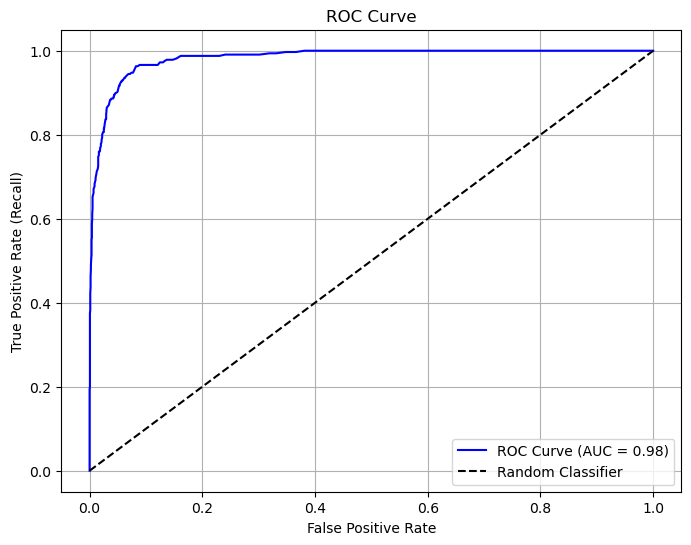

In [18]:
# executando modelo de predição com os dados de teste
y_pred = grid_search.best_estimator_.predict(X_test)

# salvando metricas
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

#exibindo valores
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
if hasattr(grid_search.best_estimator_, "predict_proba"):
    y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Resultados com o modelo de teste
|  f1   |  Recall  |  Precision  |  ROC AUC  |
|-------|----------|-------------|-----------|
| 83.7% | 81.5%    | 86.0%       | 98.2%     |

Indica que o modelo consegue prever com precisão 86% dos casos que ele classificou como positivos (ou seja, quando o modelo diz que é positivo, ele acerta 86% das vezes).

De todos os valores que realmente deveriam ser positivos, o modelo conseguiu identificar corretamente 81% (Recall).

Essa relação entre Recall e Precision é bem equilibrada, resultando em um F1-Score de 83.7%.

O valor do auce roc indica que temos uma otima capacidade de classificar os casos positivos ou negativos.

Ao analisarmos as metricas durante o treinamento e durante o teste, notamos que seus valores são muito proximos, o que indica que não ocorreu overfitting

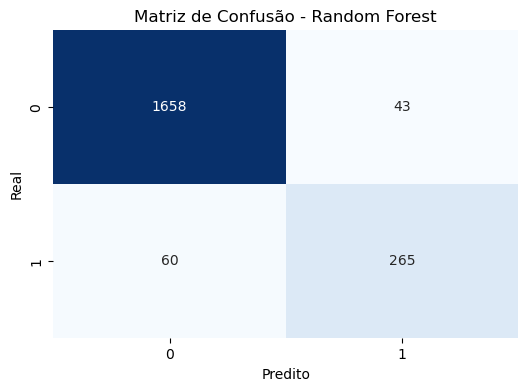

In [21]:
def plot_confusion_matrix(y_true, y_pred, model_name="Modelo"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()


plot_confusion_matrix(y_test, y_pred, model_name="Random Forest")

Ao realizar o teste como a divisão de testes o modelo se manteve com bons valores, muito proximos aos valores presentes no treinamento

## Conclusão

Após a avaliação dos modelos chega-se a conclusão que os modelos de LinearRegression e KNeightbors não são adequados para predições apresentando valores de predição e F1 baixos

Apesar dos modelos de deicion tree e random forest terem se mostrados eficientes, o modelo de forest se mostrou mais adequado apresentando valores iguais ou superiores a arvore de decisões em todos as metricas utilizadas para suas avaliações.

Os valores do modelo de floresta, demonstram que o modelo não apenas realiza boas previsões, mas também mantém o equilíbrio entre precisão e abrangência (recall), com excelente capacidade de discriminação (ROC AUC).